In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 

In [2]:
pop=pd.read_csv('popularity.csv')
pop.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
pop.shape

(39644, 61)

In [4]:
pop.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [5]:
# a=len(pop.columns)
# b=1
# plt.figure(figsize=(15,10))
# for i in range(a-1):
#     plt.subplot(20,3,b)
#     plt.scatter(pop.iloc[:,i],pop.iloc[:,(i+1)])
#     b+=1

In [6]:
pop.drop('url',axis=1,inplace=True)

In [7]:
col=list(pop.columns[(pop.skew()>1.96) | (pop.skew()<-1.96)])
for i in col:
    pop.drop(i,axis=1,inplace=True)

In [13]:
pop.skew()

 timedelta                        0.120504
 n_tokens_title                   0.165320
 num_keywords                    -0.147251
 data_channel_is_entertainment    1.683585
 data_channel_is_bus              1.876870
 data_channel_is_tech             1.619976
 data_channel_is_world            1.405169
 kw_avg_max                       0.624310
 kw_min_avg                       0.467976
 weekday_is_monday                1.775908
 weekday_is_tuesday               1.610547
 weekday_is_wednesday             1.600971
 weekday_is_thursday              1.637070
 LDA_00                           1.567463
 LDA_02                           1.311695
 LDA_03                           1.238716
 LDA_04                           1.173129
 global_subjectivity             -1.372689
 global_sentiment_polarity        0.105457
 global_rate_positive_words       0.323047
 global_rate_negative_words       1.491917
 rate_positive_words             -1.423106
 rate_negative_words              0.407241
 avg_positi

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x=pop

In [14]:
x_sc=sc.fit_transform(x)

In [15]:
from sklearn.cluster import KMeans

In [19]:
pop_inertia=[]
k=list(range(1,10))
for i in k:
    km=KMeans(i).fit(x_sc)
    y_km=km.fit_predict(x_sc)
    pop_inertia.append(km.inertia_)
pop_inertia

[1228964.0,
 1119085.6875070473,
 1039044.1229992997,
 966291.4607478543,
 891139.7512130627,
 851798.1883603622,
 825299.8016421346,
 807536.5255226033,
 792077.2217651238]

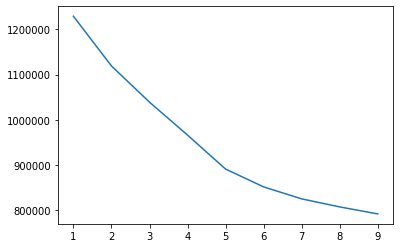

In [20]:
plt.plot(k,pop_inertia)

In [21]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_means=kmeans.fit_predict(x_sc)
y_means

array([4, 1, 1, ..., 4, 0, 4])

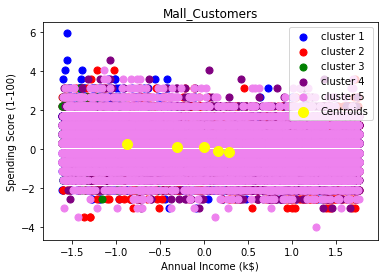

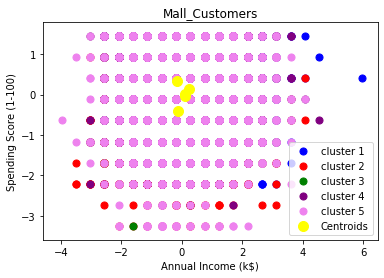

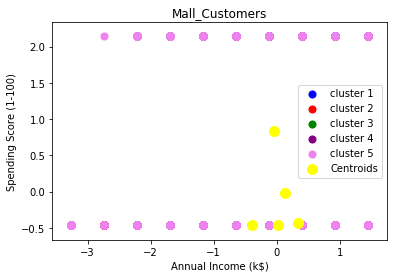

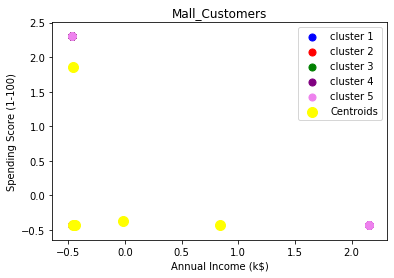

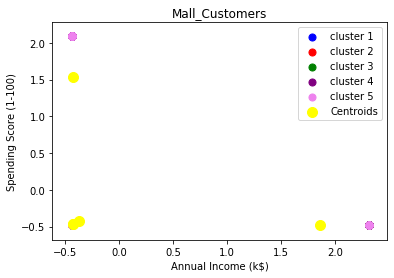

In [22]:
for j in range(0,5):
    plt.scatter(x_sc[y_means==0,j],x_sc[y_means==0,j+1],s=50,c='blue',label='cluster 1')
    plt.scatter(x_sc[y_means==1,j],x_sc[y_means==1,j+1],s=50,c='red',label='cluster 2')
    plt.scatter(x_sc[y_means==2,j],x_sc[y_means==2,j+1],s=50,c='green',label='cluster 3')
    plt.scatter(x_sc[y_means==3,j],x_sc[y_means==3,j+1],s=50,c='purple',label='cluster 4')
    plt.scatter(x_sc[y_means==4,j],x_sc[y_means==4,j+1],s=50,c='violet',label='cluster 5')
    plt.scatter(kmeans.cluster_centers_[:,j],kmeans.cluster_centers_[:,j+1],s=100,c='yellow',label='Centroids')
    plt.title('Mall_Customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()